0.7 és 1.8 között

12:43 - -1/5 ramp
12:55 - 1/5 ramp
13:12 - 1/3 ramp
13:21 - -1/3 ramp
13:27 - 1/2 ramp
13:36 --1/2 ramp


In [403]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
d = [50.1, 50.5, 50.4, 50.5, 49., 49.7, 48.8, 25.2, 6.5, 8.3, 2.2, 0.9, 0.6, 0.6, 0.6, 0.6, 0.5]


15:19 - 1/3 ramp
15:42 --1/3 ramp
15:43 - csillapodas
15:49 - 1/3 ramp
15:51 - 1/5 ramp
15:58 - -1/5 ramp

16:08 - 1/4 ramp
16:16 - -1/4 ramp

16:24 - 1/6 ramp
16:36 - -1/6 ramp 

16:58 - 1/7 ramp
17:24 --1/7 ramp

17:35 - 1/2 ramp
17:39 --1/2 ramp

17:58 - 1/10 ramp




In [2]:
d = [50.7, 51.,2, 51.3, 51.4, 51.3, 51.2, 42., 29., 8., 1.7, 1.2, 1.1, 1.1, 0.9, 0.7, 0.2]

In [1]:
import numpy as np
import cv2
framerate = 29.18
from scipy import signal
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
#%cd "D:\Interfacial Waves resonance videos 0430"

In [5]:
%cd 0513_resonance_vids

C:\Users\balin\Docs\0513_resonance_vids


In [6]:
videos = ['1__2_ramp', '1__3_ramp', '1__4_ramp', '1__5_ramp', '1__6_ramp', '1__7_ramp']
negvideos = ['neg'+e for e in videos]

In [7]:
negvideos

['neg1__2_ramp',
 'neg1__3_ramp',
 'neg1__4_ramp',
 'neg1__5_ramp',
 'neg1__6_ramp',
 'neg1__7_ramp']

In [8]:
for a in videos:
    %mkdir "$a"
    vidcap = cv2.VideoCapture('%s.mp4' %a)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite("%s/frame%d.jpg" %(a, count), image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1
    print("Done: %s" %a)

Done: 1__2_ramp
Done: 1__3_ramp
Done: 1__4_ramp
Done: 1__5_ramp
Done: 1__6_ramp
Done: 1__7_ramp


In [9]:
for a in negvideos:
    %mkdir "$a"
    vidcap = cv2.VideoCapture('%s.mp4' %a)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite("%s/frame%d.jpg" %(a, count), image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1
    print("Done: %s" %a)

Done: neg1__2_ramp
Done: neg1__3_ramp
Done: neg1__4_ramp
Done: neg1__5_ramp
Done: neg1__6_ramp
Done: neg1__7_ramp


In [94]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

def printMaxAmpl(img, col, loc):
    #img = img[120:515, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    #cv2.equalizeHist(img)
    #return locateInterface(img, maxplace, col)
    
    img = img[150:600, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.25)
    maxplace = np.argmax(np.abs((np.diff(peaksimg))))
    place = peaksimg[1:][maxplace]
    width = np.max(np.abs(np.diff(np.diff(peaksimg))))
    return [place, width]


def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 2.5*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 2.5*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)>2.5*std
    return filtered

def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev

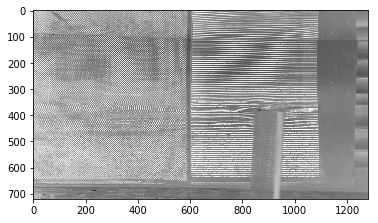

In [114]:
img = cv2.flip(cv2.imread("1__2_ramp/frame2500.jpg", cv2.IMREAD_GRAYSCALE), -1)

cv2.equalizeHist(img)
plt.imshow(img, cmap='Greys')
plt.show()

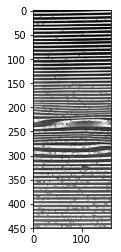

In [52]:
imgcut = img[150:600, 640:800]
plt.imshow(imgcut, cmap='Greys')
imgref = imgcut[:, 75]

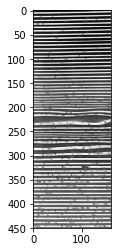

In [115]:
imgcut = img[150:600, 640:800]
plt.imshow(imgcut, cmap='Greys')
imgref = imgcut[:, 75]

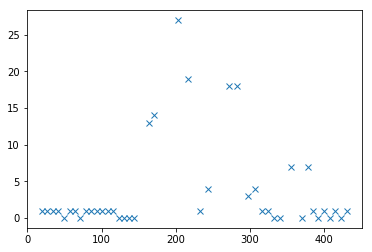

In [124]:


peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.3)

plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")


In [25]:
import os
def measureInterface(src):
    ls = os.listdir(src) # list
    numberOfFiles = len(ls)
    ampls = []
    for i in range(numberOfFiles):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img,75, [640, 800]))
    return np.array(ampls)

In [106]:
asd = measureInterface('1__2_ramp')

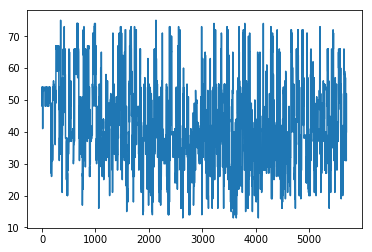

In [108]:
plt.plot(filterUntilSmooth(asd[:,1]))
#plt.xlim(3000. ,3100)

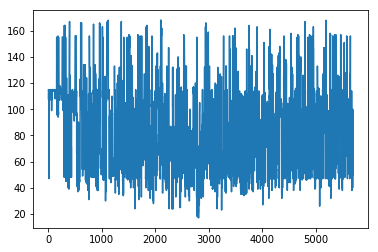

In [48]:
plt.plot(filterUntilSmooth(asd[:,1]))

In [127]:
N = int(20*29.18)
a = np.convolve(filterUntilSmooth(asd[:,1]), np.ones((N,))/(N), mode='valid')

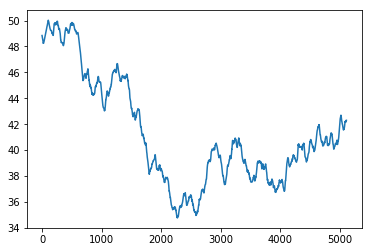

In [128]:
plt.plot(a)

In [95]:
asd2 = measureInterface('1__7_ramp')

In [104]:
a = np.convolve((asd2[:,1]), np.ones((N,))/(N), mode='valid')

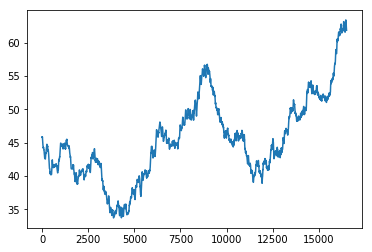

In [105]:
plt.plot( a)


In [131]:
src = "C:/Users/balin/Docs/0513_resonance_vids/" 

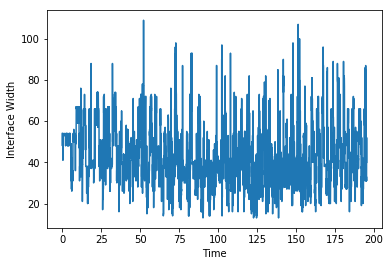

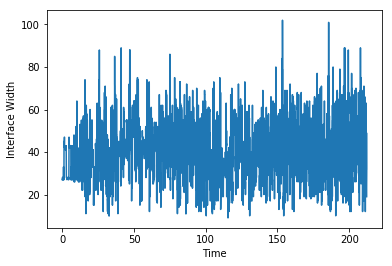

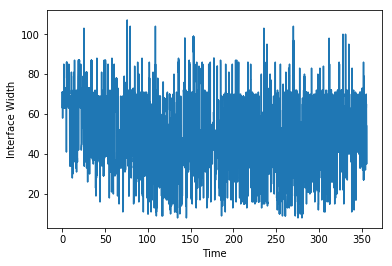

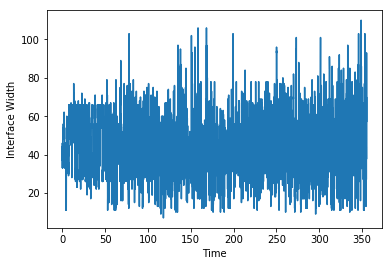

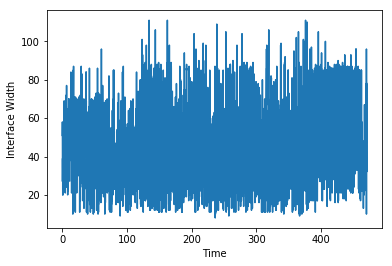

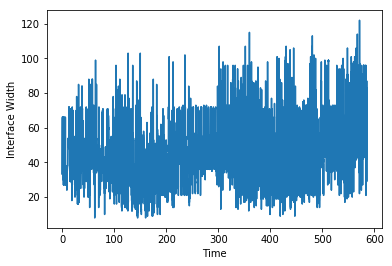

In [396]:
for v in videos:
    asd = np.loadtxt("data0512/%s" %v)
    plt.plot(np.arange(0., len(asd), 1)/29.18, asd[:,1])
    plt.xlabel('Time')
    plt.ylabel('Interface Width')
    plt.show()

In [136]:
frozen1 = np.loadtxt('data0509/0419_frozenFreqs.dat')
frozen2 = np.loadtxt('data0509/0509_frozenFreqs.dat')

In [231]:

from scipy.ndimage.filters import uniform_filter

def window_stdev(arr, radius):
    padded = np.zeros(len(arr)+2*radius)
    padded[radius:-radius]= arr
    c1 = uniform_filter(padded, radius*2, mode='constant', origin=-radius)
    c2 = uniform_filter(padded*padded, radius*2, mode='constant', origin=-radius)
    return ((c2 - c1*c1)**.5)[:-radius*2+1]
def slidingStd(x, w):
    result = np.zeros_like(x)
    for index in range(len(x)):
#        print(index)
#        print(w)
#        print(min(w, index))
        windowlength = min(w, index)
        if(index>0):
            view = x[index-windowlength:index]
        else:
            view = x[0]
        result[index] = view.std()
    return result

def slidingFFT(x, w, dt):
    result = np.zeros_like(x)
    for index in range(w, len(x)):
        windowlength = min(w, index)
        view = x[index-windowlength:index]
        np_fft = np.fft.fft(view-np.average(view))
        n_samples = len(view)
        T = dt*n_samples
        df = 1./T
        amplitudes = 2./n_samples * np.abs(np_fft) 
        frequencies = np.fft.fftfreq(n_samples) * n_samples*df
    
        result[index] = frequencies[:len(frequencies)//2][np.argmax(amplitudes)]
    return result


def lin(x, a,b):
    return x*a+b

### Ramps 05.12

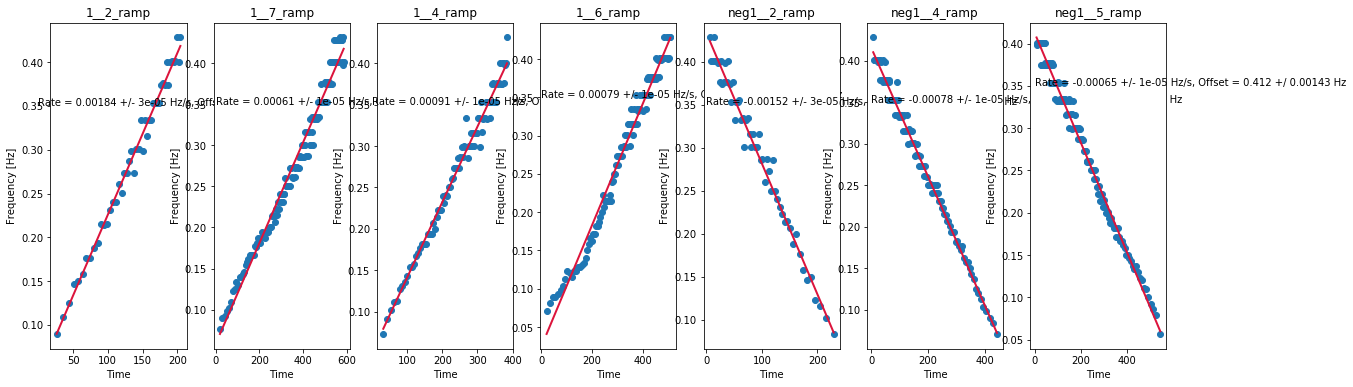

In [397]:
from scipy.optimize import curve_fit
ramps = ['1__2_ramp', '1__7_ramp', '1__4_ramp', '1__6_ramp', 'neg1__2_ramp', 'neg1__4_ramp', 'neg1__5_ramp']
rampsData = {}
## diagnostics:
fig, axes = plt.subplots(1, 7, figsize=(20,6))
axeslist = axes.flatten()

for i,e in enumerate(ramps):
    dictionary = {}
    driving = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0512/driving/%s' %e, skiprows=2)
    fr = 1/(driving[1,0]) ##framerate
    
    peaks, _ = find_peaks(driving[:,1]-np.average(driving[:,1]), height=40)
    #filt = (1./np.diff(driving[:,1][peaks]))<0.5
    from scipy import signal
    N = int(20*fr)
    ax = axeslist[i]
    #f, t, Zxx = signal.stft(driving[:,1], fr, nperseg=200,noverlap=199, detrend='constant')
   
    t = driving[:,0][peaks][1:]
    dictionary['f'] = f
    dictionary['t'] = t
    dictionary['Zxx'] = Zxx
    dictionary['time'] = driving[:,0]
    filt =  (1./np.diff(driving[:,0][peaks])) < 0.5
    dictionary['frequencies'] =  (1./np.diff(driving[:,0][peaks]))[filt]

    popt, pcov = curve_fit(lin, t[filt], dictionary['frequencies'])
    error = np.sqrt(np.diag(pcov))

    ax.plot(t[filt],  dictionary['frequencies'], 'o')
    ax.plot(t[filt], lin(t[filt], *popt), '-', c='Crimson', linewidth=2.)
    ax.text(0., 0.35, r'Rate = %s +/- %s Hz/s, Offset = %s +/ %s Hz' %(round(popt[0], 5), round(error[0], 5), round(popt[1], 3), round(error[1], 5)))
    ax.set_title(e)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency [Hz]')
    dictionary['coeffs'] = popt
    dictionary['errors'] = error
    N = int(20*framerate)
    rampsData[e] = {}
    rampsData[e]['driving'] = dictionary
    #rampsData[e]['surface'] = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0509/2/surface/%s' %e, skiprows=2)
    
fig.tight_layout()

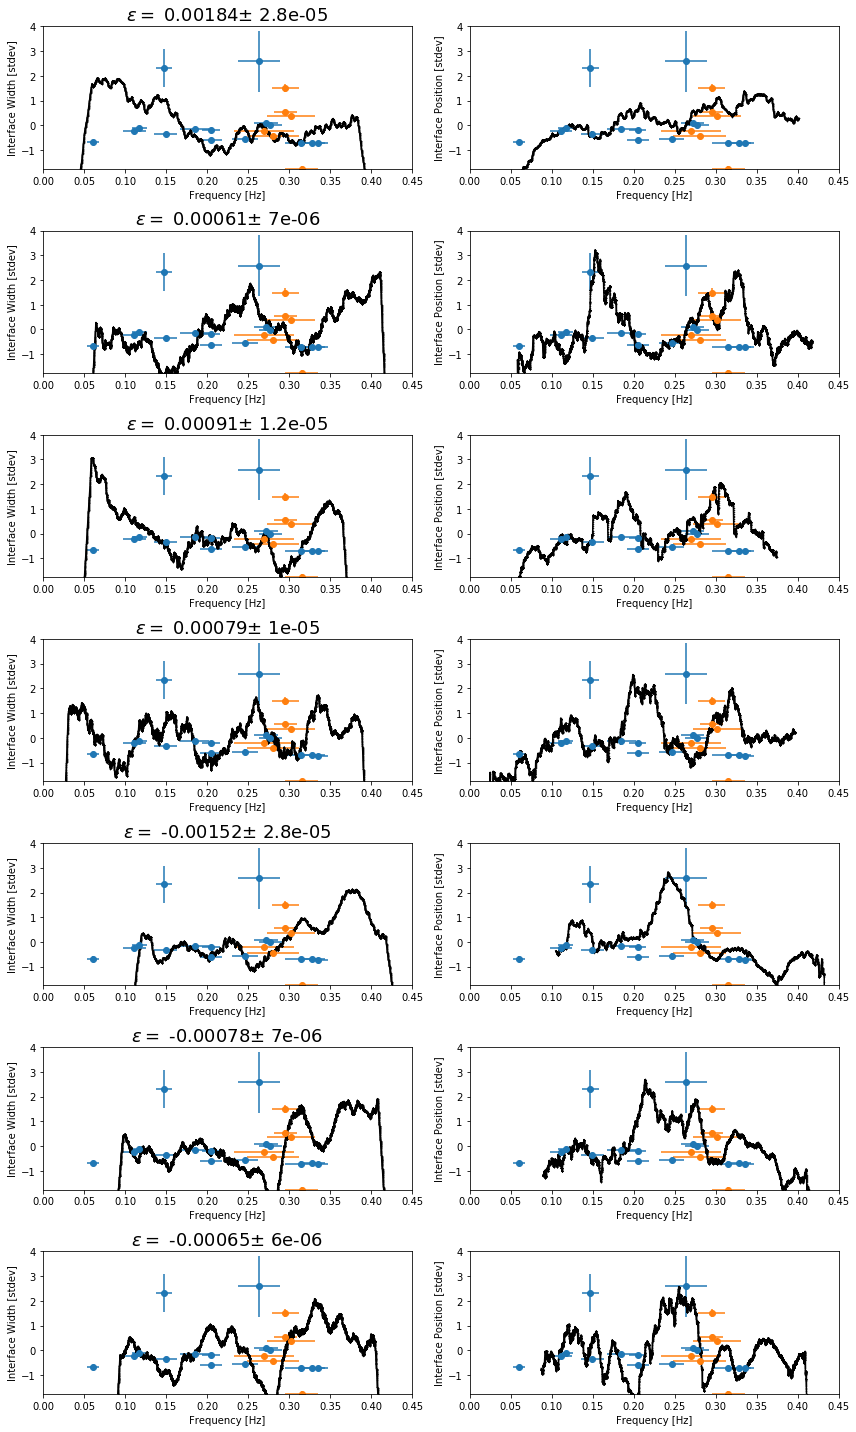

In [401]:
fig, axes = plt.subplots(7, 2, figsize=(12,20))
framerate = 29.18
for i,e in enumerate(rampsData.values()):
    N = int(20*framerate)
    data = np.loadtxt('C:/Users/balin/Docs/boSchlieren/data0512/%s' %ramps[i])
    #movingAvgI = np.convolve(data[i][:,0], np.ones((N,))/N, mode='same')
    movingAvgw = np.convolve(filterUntilSmooth(data[:,1]), np.ones((N,))/N, mode='same')
    #dictionary['movingAvg'] = movingAvgI
    dictionary['movingAvgw'] = normalize(movingAvgw)
    movingStdevIF = slidingStd(data[:,0], N)
    
    dictionary['position'] = normalize(movingStdevIF)
    dictionary['time'] = np.arange(0., data.shape[0],1)/framerate
    ax = axes[:,0][i]
    ax2 = axes[:,1][i]
    ax.plot(lin(np.arange(0., movingAvgw.shape[0],1)/framerate, *e['driving']['coeffs']), normalize(movingAvgw), '-o', c='black', markersize=0.5)
#    ax.text(0., 0.35, r'Rate = %s +/- %s Hz/s, Offset = %s +/ %s Hz' %(round(popt[0], 5), round(error[0], 5), round(popt[1], 3), round(error[1], 5)))
    ax.errorbar(frozen1[:,0], frozen1[:,1], fmt='o', xerr=frozen1[:,2], yerr=frozen1[:,3])
    ax.errorbar(frozen2[:,0], frozen2[:,1], fmt='o', xerr=frozen2[:,2], yerr=frozen2[:,3])
    ax.set_ylim(np.min(frozen2[:,1]), 4.)
    ax.set_xlim(0., 0.45)
    ax.set_title("$\epsilon = $ %s$\pm$ %s" %(round(e['driving']['coeffs'][0], 5), round(e['driving']['errors'][0], 6)) , fontsize=18)
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Interface Width [stdev]')
    #print(movingStdevSF)
    ax2.plot(lin(np.arange(0., movingAvgw.shape[0],1)/framerate, *e['driving']['coeffs']), normalize(movingStdevIF), '-o', c='black', markersize=0.5)
    ax2.errorbar(frozen1[:,0], frozen1[:,1], fmt='o', xerr=frozen1[:,2], yerr=frozen1[:,3])
    ax2.errorbar(frozen2[:,0], frozen2[:,1], fmt='o', xerr=frozen2[:,2], yerr=frozen2[:,3])
    ax2.set_ylim(np.min(frozen2[:,1]), 4.)
    ax2.set_xlim(0., 0.45)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Interface Position [stdev]')

    e['interface'] = dictionary
    #allData[e] = dictionary
fig.tight_layout()